<a href="https://colab.research.google.com/github/nav0203/Hair-Salon-Data-Principal-Component-Analysis/blob/main/Hair_Salon_Data_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hair Salon Data: Principal Component Analysis**

## **Introduction**

Understanding customer satisfaction is critical for businesses looking to sustain growth and client
loyalty in today's cutthroat business environment. In order to achieve this, companies gather a lot of
information on a variety of aspects that could affect client pleasure, such as order processing,
complaint handling, and product and service delivery. However, due to its enormous dimensionality
and complexity, successfully analyzing and interpreting this data can be difficult.
In this particular dataset we have information about a Hair Salon and various features like Customer
Satisfaction, Complaint Resolution, Product Quality, Competitive Pricing etc. This dataset can
provide an in-depth knowledge about the overall customer experience and various factors that could
drive this. Hence, we can do an analysis of these variables step by step from Univariate to
Multivariate Analysis and we will also perform a Principal Component Analysis (PCA) to reduce the
dimensionality of the data.

### **Problem Statement**


The difficulty is figuring out which of the many characteristics that companies gather are the most
important ones that affect customer satisfaction. Large datasets may be difficult to extract valuable
insights from using traditional methods of analysis, which could result in less-than-ideal decisions and
resource allocation. Advanced analytical methods are therefore required in order to extract the
relevant information from large, complicated datasets and offer useful insights that may be used to
improve customer satisfaction tactics.

### **Objectives of our analysis**


1. Exploratory Data Analysis (EDA): Conducting a comprehensive exploration of the
dataset to understand the distribution, characteristics, and interrelationships among
various variables.
• Univariate Analysis
• Multivariate Analysis
2. Identification of Key Factors: Identifying the most influential factors that contribute to
the overall customer satisfaction amongst all the other variables.
3. Performing a Principal Component Analysis (PCA): The primary goal of this report is
to leverage Principal Component Analysis (PCA) to identify the key factors that
significantly impact customer satisfaction. By reducing the dimensionality of the dataset
and extracting the principal components, we aim to uncover the underlying patterns and
relationships among the various factors.
4. Enhance Decision-Making for the Business: By providing actionable insights into the
factors driving customer satisfaction, this report aims to empower decision-makers with
the knowledge needed to make informed decisions. Whether it's optimizing product
offerings, refining service delivery processes, or enhancing complaint resolution
mechanisms, businesses can leverage the findings to drive strategic initiatives aimed at
improving overall customer experience.

**Importing the necessary liabraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

**Importing the Dataset**

Mounting Google Drive in Collab

Loading information from csv file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


• Loading the data from the csv file to Python

In [ ]:
# Store the csv file path in a variable
path = "/content/drive/My Drive/Factor-Hair-Revised.csv"

In [ ]:
df=pd.read_csv(path)

In [ ]:
print(df)

     ID  ProdQual  Ecom  TechSup  CompRes  Advertising  ProdLine  SalesFImage  \
0     1       8.5   3.9      2.5      5.9          4.8       4.9          6.0   
1     2       8.2   2.7      5.1      7.2          3.4       7.9          3.1   
2     3       9.2   3.4      5.6      5.6          5.4       7.4          5.8   
3     4       6.4   3.3      7.0      3.7          4.7       4.7          4.5   
4     5       9.0   3.4      5.2      4.6          2.2       6.0          4.5   
..  ...       ...   ...      ...      ...          ...       ...          ...   
95   96       8.6   4.8      5.6      5.3          2.3       6.0          5.7   
96   97       7.4   3.4      2.6      5.0          4.1       4.4          4.8   
97   98       8.7   3.2      3.3      3.2          3.1       6.1          2.9   
98   99       7.8   4.9      5.8      5.3          5.2       5.3          7.1   
99  100       7.9   3.0      4.4      5.1          5.9       4.2          4.8   

    ComPricing  WartyClaim 

**Data Description**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,50.500,29.011492,1.0,25.750,50.50,75.250,100.0
ProdQual,100.0,7.810,1.396279,5.0,6.575,8.00,9.100,10.0
Ecom,100.0,3.672,0.700516,2.2,3.275,3.60,3.925,5.7
TechSup,100.0,5.365,1.530457,1.3,4.250,5.40,6.625,8.5
CompRes,100.0,5.442,1.208403,2.6,4.600,5.45,6.325,7.8
Advertising,100.0,4.010,1.126943,1.9,3.175,4.00,4.800,6.5
ProdLine,100.0,5.805,1.315285,2.3,4.700,5.75,6.800,8.4
SalesFImage,100.0,5.123,1.072320,2.9,4.500,4.90,5.800,8.2
ComPricing,100.0,6.974,1.545055,3.7,5.875,7.10,8.400,9.9
WartyClaim,100.0,6.043,0.819738,4.1,5.400,6.10,6.600,8.1


**Description of Columns**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            100 non-null    int64  
 1   ProdQual      100 non-null    float64
 2   Ecom          100 non-null    float64
 3   TechSup       100 non-null    float64
 4   CompRes       100 non-null    float64
 5   Advertising   100 non-null    float64
 6   ProdLine      100 non-null    float64
 7   SalesFImage   100 non-null    float64
 8   ComPricing    100 non-null    float64
 9   WartyClaim    100 non-null    float64
 10  OrdBilling    100 non-null    float64
 11  DelSpeed      100 non-null    float64
 12  Satisfaction  100 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


**Interpretation if the above output**

• There are 100 rows of data and 13 columns.

• All the rows are non-null meaning they do not have any missing values.

• ID column which is a unique identifier is in “int64” data type.

• All the other variables are numeric data types and are “float64”.

## **Data Preprocessing**

Data preprocessing is done to remove any missing values, duplicated rows and any errors from
the data.

### **Removing Missing Values or finding if there is any Missing Data**

In [ ]:
missing_data = df.isnull()
if missing_data.any().any():
    print("There is missing data.")
else:
    print("There is no missing data.")

There is no missing data.


### **Finding if their is any duplicate row in the given data set**

In [ ]:
duplicate_rows = df.duplicated()

In [ ]:
print(duplicate_rows)

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool


 Upon preliminary analysis of the data, we found this dataset had no missing values and
duplicated rows, but ‘ID’ column is not relevant to our analysis and hence, we decided on
dropping that column from our data to ensure smooth analysis without any confusions with other
numeric variables.

In [ ]:
df.drop(['ID'], axis=1)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,8.6,4.8,5.6,5.3,2.3,6.0,5.7,6.7,5.8,4.9,3.6,7.3
96,7.4,3.4,2.6,5.0,4.1,4.4,4.8,7.2,4.5,4.2,3.7,6.3
97,8.7,3.2,3.3,3.2,3.1,6.1,2.9,5.6,5.0,3.1,2.5,5.4
98,7.8,4.9,5.8,5.3,5.2,5.3,7.1,7.9,6.0,4.3,3.9,6.4


Q1: Perform Exploratory Data Analysis (both univariate and multivariate analysis to be performed). The inferences drawn from this should be properly documented.

## **Exploratory Data Analysis**

### **Univariate Analysis**

Univariate data refers to a kind of data in which every data point corresponds to a single variable. In other words, it involves the dimension or observation of a single specific or trait for each individual or item in the dataset. It doesn't explore connections between variables or attempt to identify causes. We'll do Descriptive Statistics and Visualizations in Univariate Analysis.
Descriptive statistics, such as measures of central tendency (mean, median, mode) and measures of dispersion (range, standard deviation), are commonly used in the analysis of univariate data.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,50.500,29.011492,1.0,25.750,50.50,75.250,100.0
ProdQual,100.0,7.810,1.396279,5.0,6.575,8.00,9.100,10.0
Ecom,100.0,3.672,0.700516,2.2,3.275,3.60,3.925,5.7
TechSup,100.0,5.365,1.530457,1.3,4.250,5.40,6.625,8.5
CompRes,100.0,5.442,1.208403,2.6,4.600,5.45,6.325,7.8
Advertising,100.0,4.010,1.126943,1.9,3.175,4.00,4.800,6.5
ProdLine,100.0,5.805,1.315285,2.3,4.700,5.75,6.800,8.4
SalesFImage,100.0,5.123,1.072320,2.9,4.500,4.90,5.800,8.2
ComPricing,100.0,6.974,1.545055,3.7,5.875,7.10,8.400,9.9
WartyClaim,100.0,6.043,0.819738,4.1,5.400,6.10,6.600,8.1


The above table provides a number of descriptions about the data and can be interpreted as following:

•Count: Total number of observations in the column.

•Mean: Average of the observations, for example, on an average, customer satisfaction was 6.198.

•Std: Standard Deviation, on an average how much an individual observation deviated from the mean, a larger standard deviation means greater variability or dispersion in that variable.

•Min: Minimum value recorded in the column.

•25%: 25th percentile or the first quartile, shows that 25% values are below that value.

•50%: Also, the median of the distribution, this value divides the data into two halves, 50% values lie below and above it.

•75%: 75th percentile or the third quartile, 75 % of the data lies below this value.

•Max: The maximum recorded value in the column.

In [ ]:
## Dropping the ID column from our data as it's an identifier
df.drop('ID', axis =1, inplace=True)

### **Visualizations**

### **1.Histograms**

 This is a very common plot to show the nature of the distributions of individual variables. We have used a Kernal Density Plot (KDE) that is laid on the histogram to show the direction and shape of the distribution.

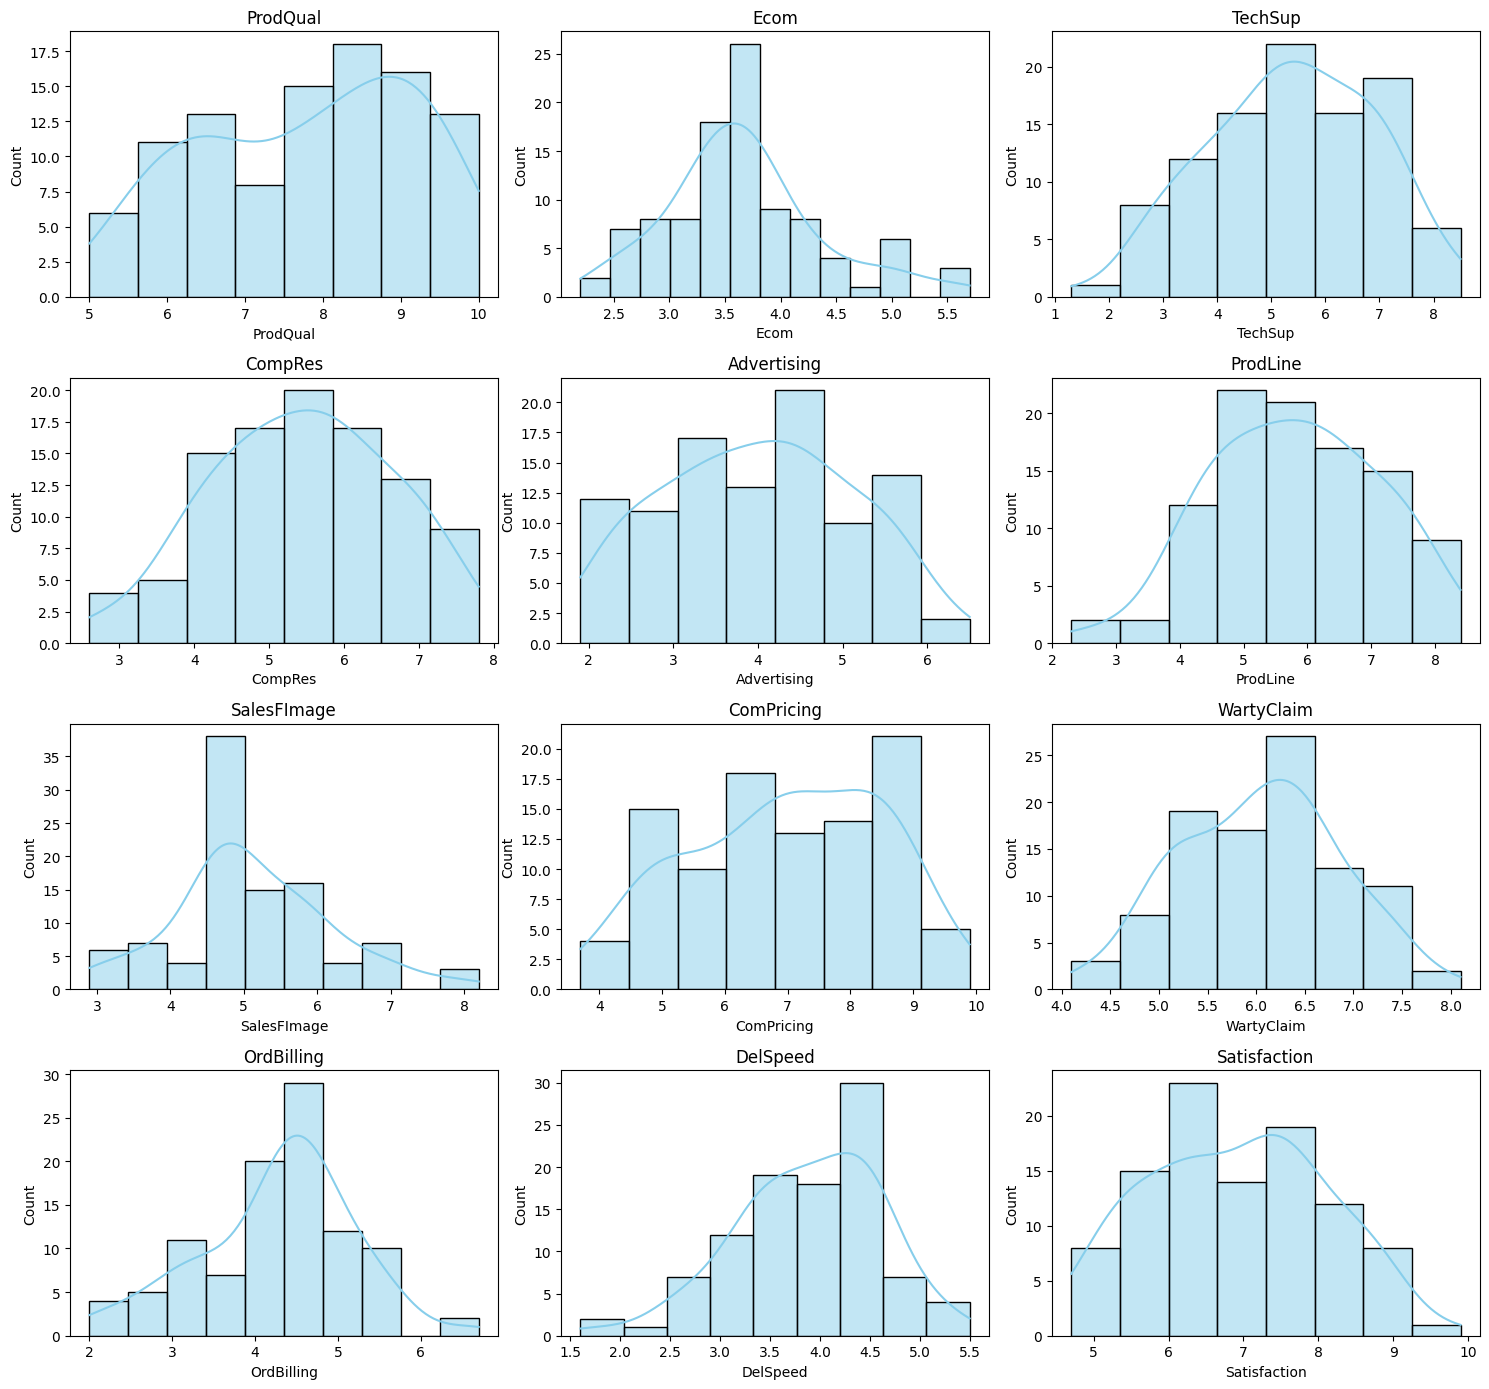

In [ ]:
## Creating histograms of all the columns to capture the distribution of each variable
plt.figure(figsize=(15, 14))
for i, col in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], color='skyblue', kde = True)
    plt.title(col)
plt.tight_layout();

### **2.Boxplots**

 The shape of the boxplot shows how the data is distributed and it also shows any outliers. The small circles in ‘Ecom’ plot are the “Outliers”. The box shows the Inter Quartile Range, the box starts with Q1 and goes up till Q3. The line in the centre is median.

Outliers: Outliers refers to those observations that are beyond a certain range of the observations. We can find out whether a column has outliers or not by looking at the maximum and minimum value of the distribution and if it is beyond the defined range.

Upper Fence: IQR * 1.5 + Q3
Lower Fence: Q1 - IQR * 1.5


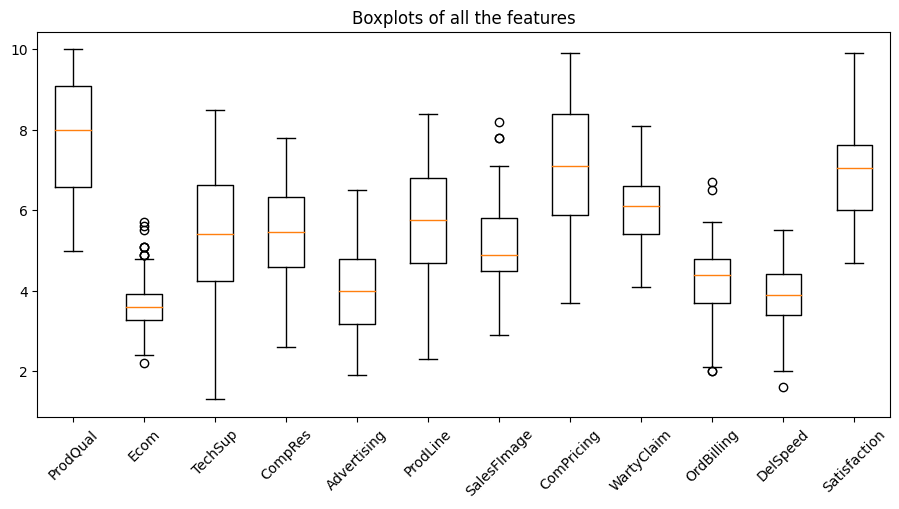

In [ ]:
## Boxplots of individual variables
plt.figure(figsize = (11,5))
plt.boxplot(df.values, labels = df.columns)
plt.title('Boxplots of all the features')
plt.xticks(rotation=45);

In the boxplots above, the columns “Ecom”, “OrdBilling”, “DelSpeed” and “SalesFImage” have outliers in the distribution.

### **3.Normal Probability plot or Normal Quantile-Quantile (Q-Q) plot**

The normal probability plot is a graphical method for assessing whether or not a data set is roughly normally distributed. The data are colluded against a theoretical normal distribution in such a way that the points should form an approximate straight line. diversions from a straight line suggest departures from normalcy. The plots below show different Q-Q plots corresponding to the shape of their distributions shown by their respective histograms. The straight line in q-q plot represents normal distribution.

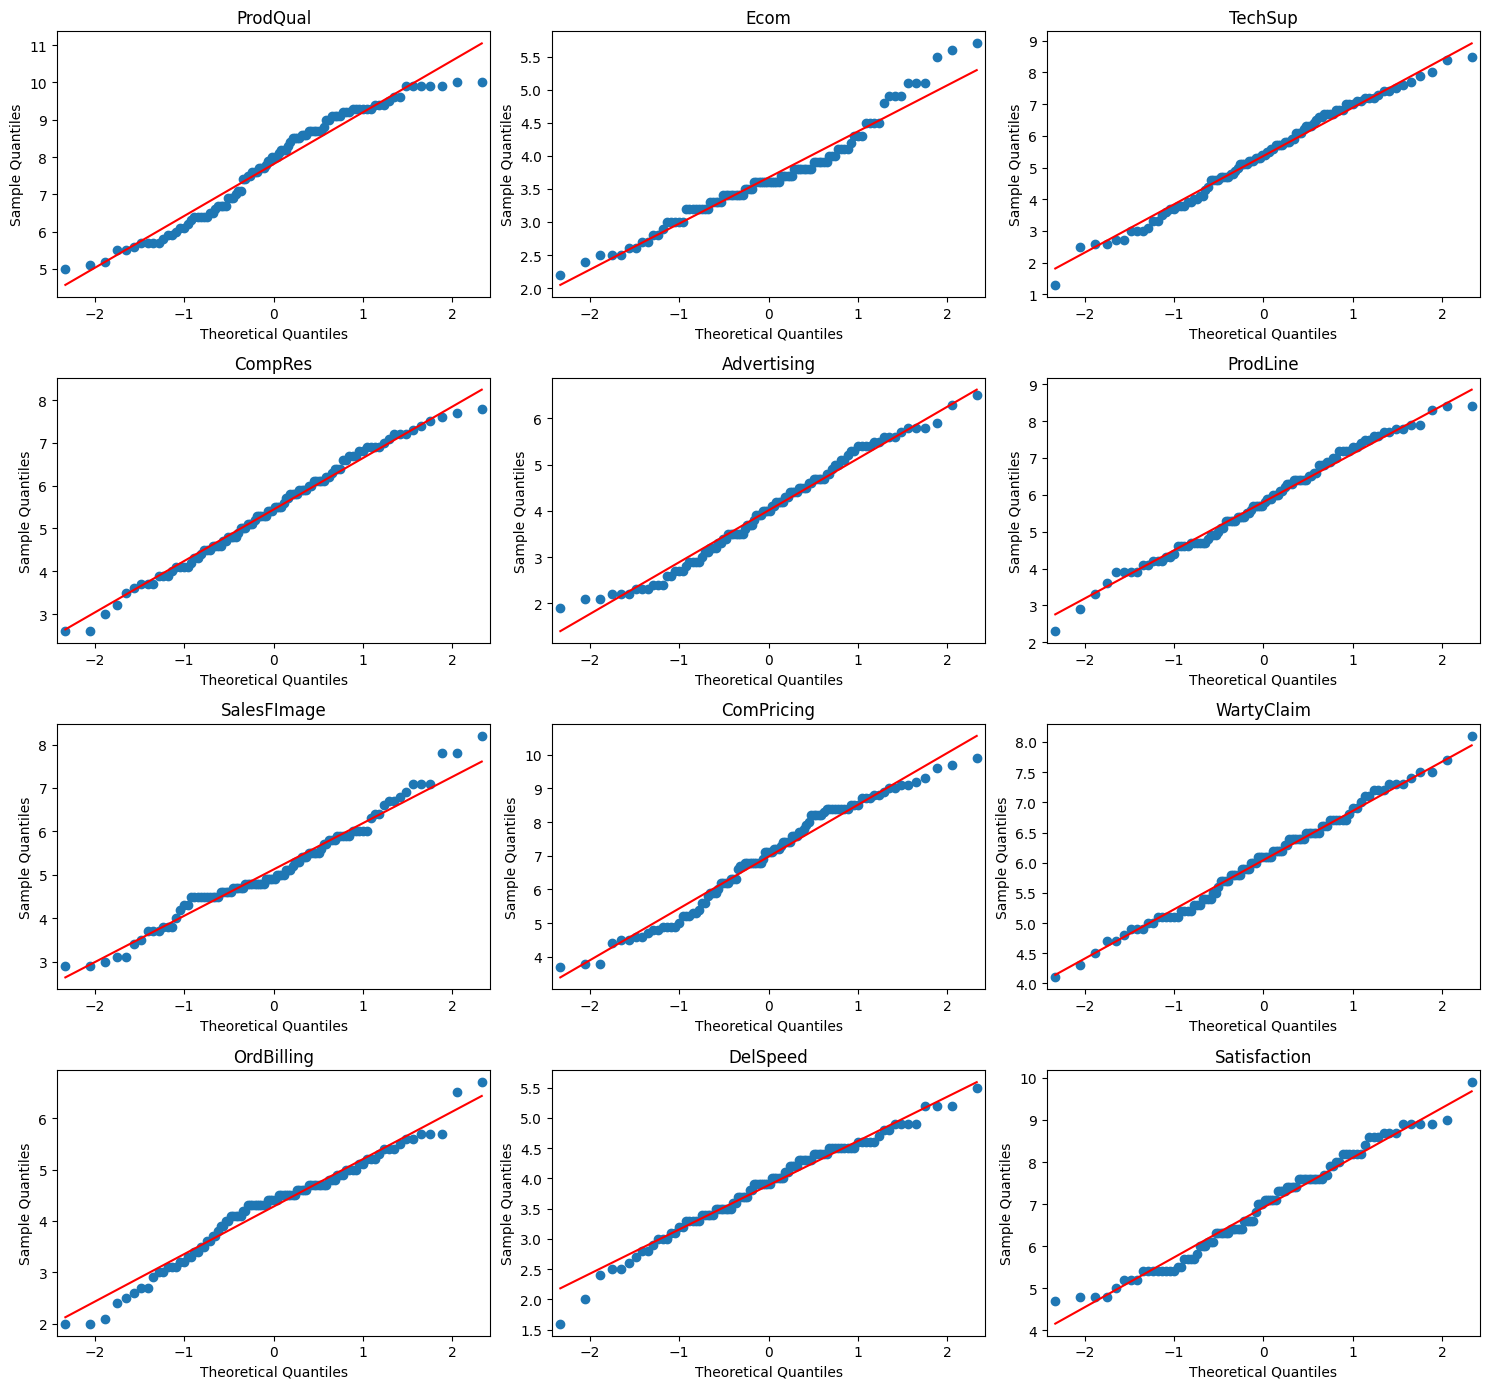

In [ ]:
## Q-Q plots
from statsmodels.api import qqplot
plt.figure(figsize=(15, 14))
for i, col in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    qqplot(df[col], line='s',ax=plt.gca())
    plt.title(col)
plt.tight_layout();

In the above plots, the points roughly approximate the normal distribution line, indicating that all the variables in this dataset are roughly normally distributed.

### **Multivariate Analysis**


Multivariate Analysis encompasses the study of relationship between more than two variables, here we are interested in analysing the impact of multiple independent variables on a dependent variable.  A scatter plot, in which one variable is plotted on the x-axis and the other on the y-axis, is the most widely used visual aid for this analysis. Correlation coefficient and heatmaps are commonly used in addition to scatter plots to examine the relationship between the variables.

### **1.Correlation Analysis**


Correlation tells us the strength and direction of the linear relationship between two variables. It can be in both negative and positive directions and the correlation coefficient that ranges from -1 to 1 tells us the strength of the relationship. For example, a correlation close to +1 means strong direct relationship between the two variables and a value close to -1 means strong inverse relationship between two variables. It gives us an idea about how strongly both variables are related to each other to work on further analysis.


In [ ]:
## Correlation Matrix
corr_matrix = df.corr()
corr_matrix

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ProdQual,1.000000,-0.137163,0.095600,0.106370,-0.053473,0.477493,-0.151813,-0.401282,0.088312,0.104303,0.027718,0.486325
Ecom,-0.137163,1.000000,0.000867,0.140179,0.429891,-0.052688,0.791544,0.229462,0.051898,0.156147,0.191636,0.282745
TechSup,0.095600,0.000867,1.000000,0.096657,-0.062870,0.192625,0.016991,-0.270787,0.797168,0.080102,0.025441,0.112597
CompRes,0.106370,0.140179,0.096657,1.000000,0.196917,0.561417,0.229752,-0.127954,0.140408,0.756869,0.865092,0.603263
Advertising,-0.053473,0.429891,-0.062870,0.196917,1.000000,-0.011551,0.542204,0.134217,0.010792,0.184236,0.275863,0.304669
ProdLine,0.477493,-0.052688,0.192625,0.561417,-0.011551,1.000000,-0.061316,-0.494948,0.273078,0.424408,0.601850,0.550546
SalesFImage,-0.151813,0.791544,0.016991,0.229752,0.542204,-0.061316,1.000000,0.264597,0.107455,0.195127,0.271551,0.500205
ComPricing,-0.401282,0.229462,-0.270787,-0.127954,0.134217,-0.494948,0.264597,1.000000,-0.244986,-0.114567,-0.072872,-0.208296
WartyClaim,0.088312,0.051898,0.797168,0.140408,0.010792,0.273078,0.107455,-0.244986,1.000000,0.197065,0.109395,0.177545
OrdBilling,0.104303,0.156147,0.080102,0.756869,0.184236,0.424408,0.195127,-0.114567,0.197065,1.000000,0.751003,0.521732


### **2.Heatmap**


A heatmap is used to visualize the correlation matrix in a clear and comprehensive way. Darker red shades indicate strong positive correlation and lighter ones show weak correlation. Darker blue shades indicate strong negative correlation and vice-versa for lighter shades.


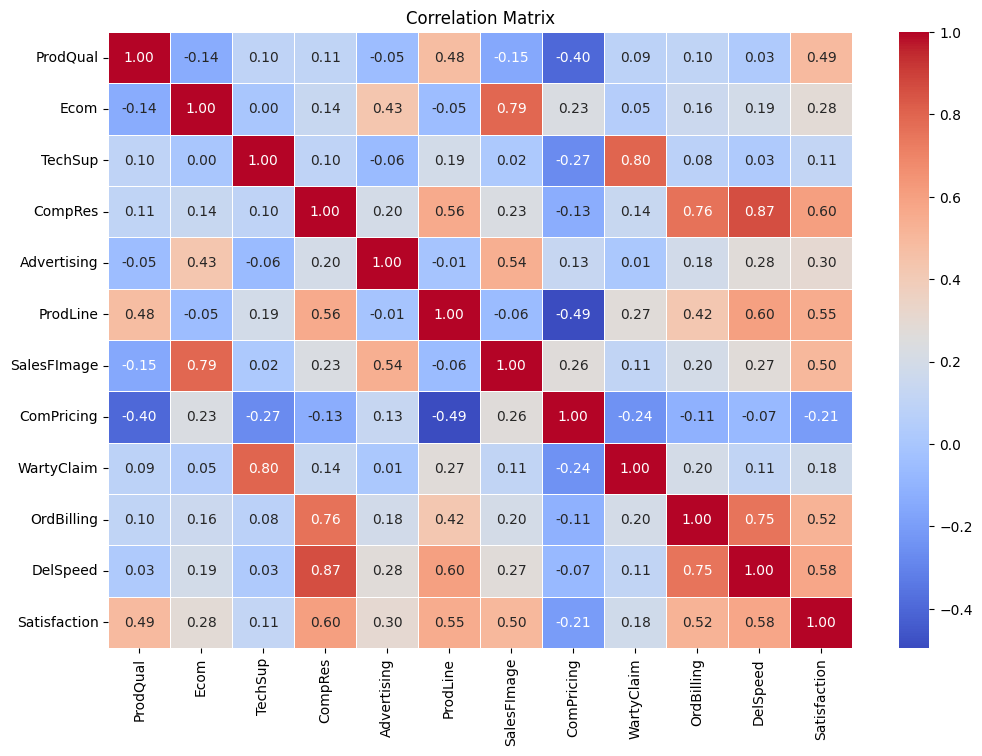

In [ ]:
## Heatmap of the above correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix');

From the above correlation analysis, we have extracted a few columns based on their strength of relationship with each other. Below is the correlation matrix for 5 columns 'CompRes' (Complaint Resolution), 'ProdLine' (Product Line), 'OrdBilling' (Order Billing), 'DelSpeed' (Delivery Speed), that are moderate to highly correlated with each other explain the maximum strength of their relationship with the variable “Satisfaction”.

In [ ]:
## Correlation coefficients of a few variables with moderate to high correlation.
df[['Satisfaction','CompRes','ProdLine','DelSpeed','OrdBilling']].corr()

,Satisfaction,CompRes,ProdLine,DelSpeed,OrdBilling
Satisfaction,1.000000,0.603263,0.550546,0.577042,0.521732
CompRes,0.603263,1.000000,0.561417,0.865092,0.756869
ProdLine,0.550546,0.561417,1.000000,0.601850,0.424408
DelSpeed,0.577042,0.865092,0.601850,1.000000,0.751003
OrdBilling,0.521732,0.756869,0.424408,0.751003,1.000000


### **3.	Scatter Matrix/plot**

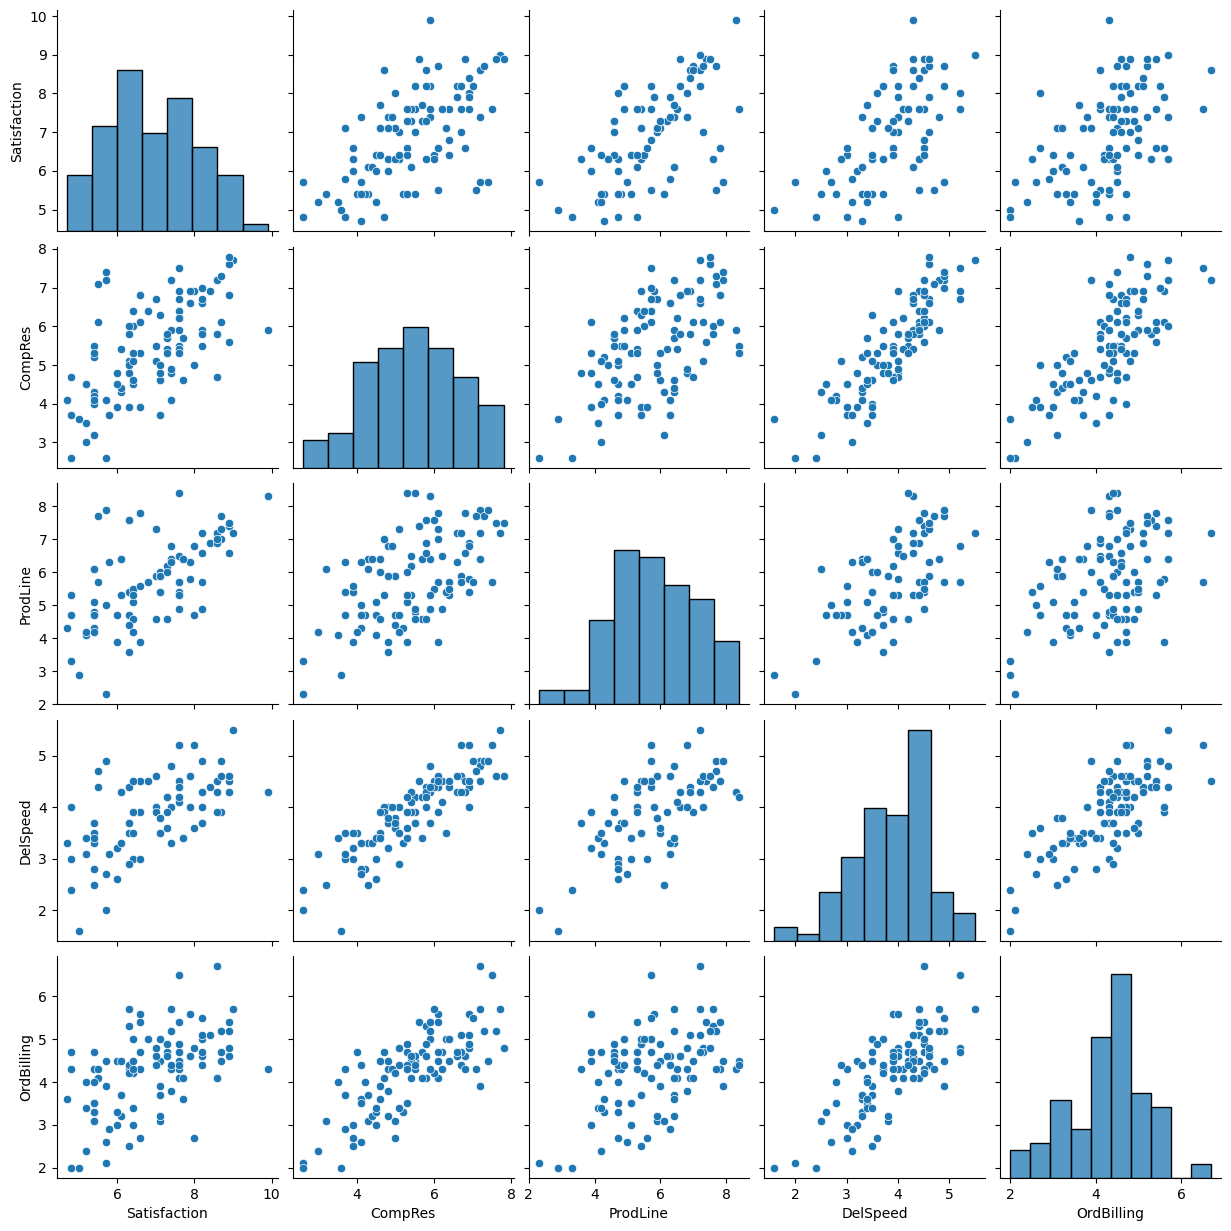

In [ ]:
## Scatter plot of the above variables
sns.pairplot(df[['Satisfaction','CompRes','ProdLine','DelSpeed','OrdBilling']]);

Inferences from the above Multivariate Analysis

1.	Highly correlated variables: A correlation coefficient that is closer to 1 is highly positively correlated coefficient. For example, ‘CompRes’ and ‘DelSpeed’ have a coefficient of 0.865092 and ‘CompRes’ and ‘OrdBilling’ have 0.756869, both indicating strong linear correlation in the same direction. It could be comprehended that that higher levels of satisfaction with Complaint Resolution are associated with higher levels of satisfaction with Delivery Speed and Order Billing, and vice versa.

2.	Moderately correlated variables: A correlation coefficient between 0.5 to 0.7 is moderately correlated. For example, correlation coefficient between ‘Satisfaction’ and ‘ProdLine’ (0.550546) and ‘OrdBilling’ (0.521732) is moderate indicating even though these variables are necessary in overall customer satisfaction and are correlated with it in the same direction but not as necessary as ‘DelSpeed’ and ‘CompRes’ are for the same.

3.	Business Implications: This correlation matrix provides insights into the relationships between different factors and customer satisfaction. Businesses can use this information to identify key drivers of satisfaction and prioritize areas for improvement to enhance the overall customer experience. Additionally, understanding the correlations between variables can inform strategic decision-making and resource allocation efforts aimed at maximizing customer satisfaction and loyalty.


# **Principal Component Analysis (PCA)**

Q1) Scale the variables and write the inference for using the type of scaling function for this case study

•	To scale the original dataset, we utilised StandardScaler. Standardisation sets each variable's mean to 0 and its standard deviation to 1. It works especially well when the dataset's variables have varying scales or units.
•	Numerous metrics, each with a unique scale, are probably included in this data, including customer service scores, delivery timeframes, and product quality ratings. By guaranteeing that every variable makes an equal contribution to the analysis, standardisation keeps variables with bigger scales from influencing the findings.
•	By standardising the variables and putting them on a uniform scale, standardisation makes it easier to compare the findings of PCA analyses and determines the relative value of each component in influencing customer satisfaction.


In [ ]:
# Drop the target variable (Satisfaction)
X = df.drop('Satisfaction', axis=1)

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the variables
X_scaled = scaler.fit_transform(X)


Standardisation provides robustness against fluctuations in variable scales, facilitates the interpretation of PCA results, and guarantees that all variables contribute equally to the study. We can more accurately pinpoint the primary factors influencing customer happiness and use that information to guide strategic decisions that will improve customer loyalty and overall experience.



Q2: Comment on the comparison between covariance and the correlation matrix after scaling.



•	After scaling the data, we have calculated the Covariance and Correlation Matrices. The values in both the matrices were approximately equal indicating variables have similar variances across different scales.

•	The covariance matrix, which measures the linear relationship between variables regardless of their scale, is similar to the correlation matrix. It displays the direction of linear relationships between two variables.
By dividing each element by the sum of the standard deviations of the two variables, the correlation matrix, on the other hand, normalises the covariance values. It is now simpler to compare the strength of linear correlations between variables thanks to this normalisation.

•	When the values in the covariance and correlation matrices are similar after scaling, it suggests that the variables have similar variances across different scales, and their linear relationships are consistent.
This consistency implies that the scaling process effectively standardizes the variables, ensuring that they contribute equally to the analysis and preventing variables with larger scales from dominating the results.


In [ ]:
# Covariance matrix
cov_matrix = np.cov(X_scaled.T)

# Correlation matrix
correl_matrix = np.corrcoef(X_scaled.T)

# Compare matrices
print("Covariance Matrix:")
print(cov_matrix)
print("\nCorrelation Matrix:")
print(correl_matrix)

Covariance Matrix:
[[ 1.01010101e+00 -1.38548704e-01  9.65661154e-02  1.07444445e-01
  -5.40132667e-02  4.82316579e-01 -1.53346338e-01 -4.05335236e-01
   8.92043497e-02  1.05356640e-01  2.79979825e-02]
 [-1.38548704e-01  1.01010101e+00  8.75544162e-04  1.41595213e-01
   4.34233041e-01 -5.32200387e-02  7.99539102e-01  2.31780203e-01
   5.24224157e-02  1.57724577e-01  1.93571786e-01]
 [ 9.65661154e-02  8.75544162e-04  1.01010101e+00  9.76329270e-02
  -6.35051180e-02  1.94571168e-01  1.71621612e-02 -2.73521901e-01
   8.05220127e-01  8.09109340e-02  2.56976702e-02]
 [ 1.07444445e-01  1.41595213e-01  9.76329270e-02  1.01010101e+00
   1.98905906e-01  5.67087831e-01  2.32072486e-01 -1.29246720e-01
   1.41826562e-01  7.64513729e-01  8.73829997e-01]
 [-5.40132667e-02  4.34233041e-01 -6.35051180e-02  1.98905906e-01
   1.01010101e+00 -1.16674936e-02  5.47680463e-01  1.35572620e-01
   1.09010852e-02  1.86096560e-01  2.78649579e-01]
 [ 4.82316579e-01 -5.32200387e-02  1.94571168e-01  5.67087831e-01


Q3: Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

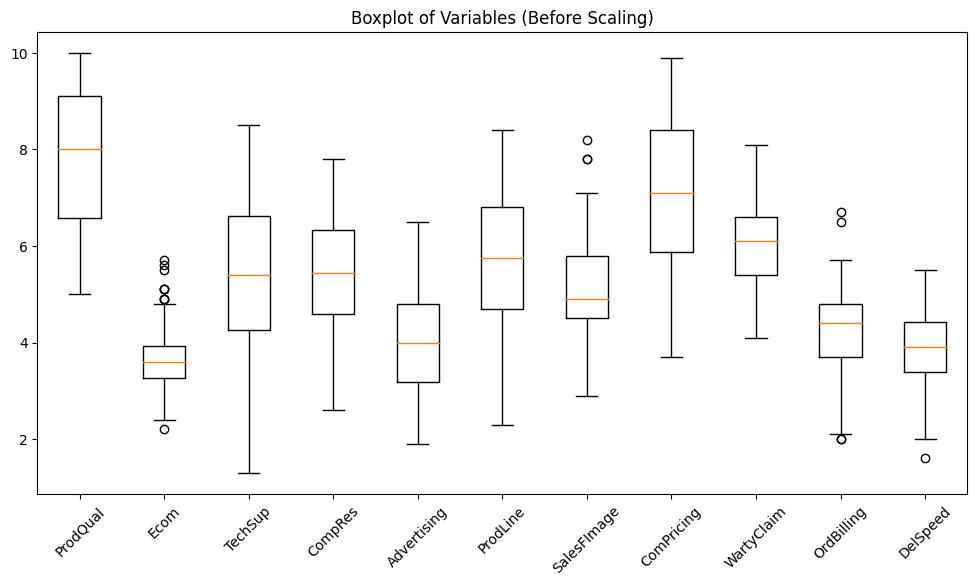

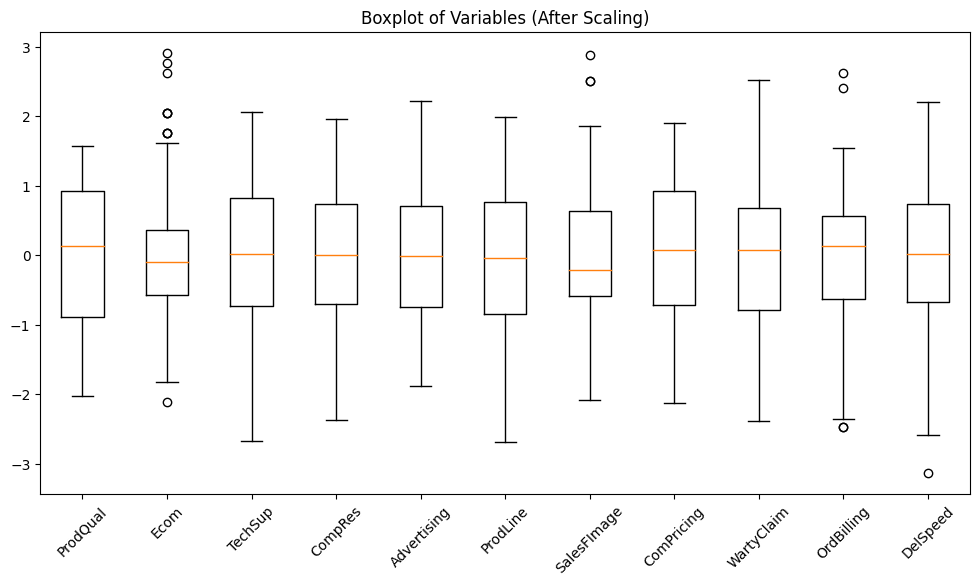

In [ ]:
## Check the dataset for outliers before and after scaling

# Before scaling
plt.figure(figsize=(12, 6))
plt.boxplot(X.values, labels=X.columns)
plt.title('Boxplot of Variables (Before Scaling)')
plt.xticks(rotation=45)

# After scaling
plt.figure(figsize=(12, 6))
plt.boxplot(X_scaled, labels=X.columns)
plt.title('Boxplot of Variables (After Scaling)')
plt.xticks(rotation=45);

We visualized the distribution of each variable in the dataset using boxplots before and after scaling. Boxplots help identify outliers and understand the distribution of values within each variable. Scaling the variables ensures that outliers are detected more accurately and that each variable contributes equally to the analysis.

Before Scaling

Outliers Detection: In the plot before scaling, outliers may be evident as data points that are significantly distant from the main cluster of values within each variable's boxplot.

Outliers before scaling may occur due to variables having different scales or units. These outliers might skew the analysis and affect the performance of certain algorithms. For example, in linear regression, outliers can heavily influence the estimation of regression coefficients.

After scaling

Outliers Detection: Even after scaling, outliers may still be visible as data points that fall outside the whiskers of the boxplots. However, their detection may be more accurate since scaling standardizes the range of values across variables.

Although outliers may still exist after scaling, their impact on the analysis is mitigated since variables are now on the same scale. Scaling ensures that outliers are treated uniformly across variables, preventing one variable's outliers from dominating the analysis. Moreover, the means of all variables being close to each other indicates that the scaling process effectively centred the data around zero, aligning their distributions.


Q4: Build the covariance matrix, eigenvalues and eigenvector. Write the explicit form of the first PC (in terms of Eigen Vectors).

The scalar and vector quantities related to the matrix that are utilised for linear transformation are called eigenvalues and eigenvectors.

Eigenvalues are the scalar values that are attached to eigenvectors and refer to the vector that remains unchanged even after undergoing modifications. The vectors connected to a system of linear equations are known as eigenvectors. Therefore, these are the characteristic values that show the amount that eigenvectors are stretched in the direction that they suggest.

 Eigenvectors, commonly referred to as characteristic vectors for a matrix, are only square matrices' eigenvectors that we can find. Eigenvectors come in handy when addressing a variety of matrix and differential equation issues.

The eigenvalue equation is provided by:
Av = λv

Where:
A is the matrix
v is associated eigenvector
λ is scalar eigenvalue

•	In our calculation, the matrix in the above equation will be replaced by the covariance matrix as it provides information about how the variables in the dataset vary together, indicating the direction and magnitude of their co-variation. PCA aims to capture the directions of maximum variance in the dataset.
•	Eigenvalues and eigenvectors are calculated from the covariance matrix to identify the principal components (PCs) of the dataset, allowing us to identify the components that capture the maximum variance in the dataset.
•	Eigenvalues represent the amount of variance explained by each principal component, while eigenvectors represent the directions of these components


In [ ]:
# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

The explicit form of the first PC (in terms of Eigen Vectors):

In [ ]:
# First principal component
first_pc = eigenvectors[:, 0]  # first element of each row of eigenvectors
print("First Principal Component (in terms of Eigen Vectors):", first_pc)

First Principal Component (in terms of Eigen Vectors): [ 0.13378962  0.16595278  0.15769263  0.47068359  0.18373495  0.38676517
  0.2036696  -0.15168864  0.21293363  0.43721774  0.47308914]


•	The first PC represents the linear combination of the original variables that explains the largest proportion of the total variance in the dataset with a certain weight.
•	It indicates the direction along which the data points are most spread out or exhibit the most variability. In practice, the first PC is often used for dimensionality reduction, as it retains the most important information in the dataset while reducing its dimensionality.




Q: Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components?


In [ ]:
# Calculate cumulative variance explained by eigenvalues
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
print("Cumulative Variance Explained by Eigenvalues:")
print(cumulative_variance)


Cumulative Variance Explained by Eigenvalues:
[0.31154285 0.54344255 0.69716768 0.79594551 0.8513477  0.90151895
 0.9380206  0.94696851 0.95904502 0.98149516 1.        ]


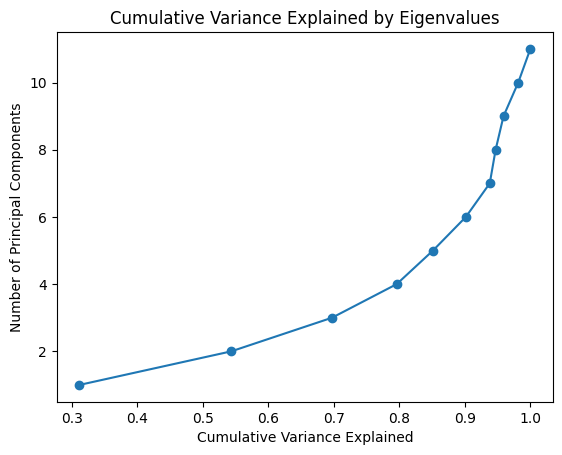

In [ ]:
# Plot cumulative variance explained
plt.plot( cumulative_variance,range(1, len(cumulative_variance) + 1), marker='o')
plt.title('Cumulative Variance Explained by Eigenvalues')
plt.ylabel('Number of Principal Components')
plt.xlabel('Cumulative Variance Explained');

The amount of variance explained by each primary component is represented by its associated eigenvalue. The whole variance explained by all of the primary components is found as the cumulative sum of these eigenvalues.

Visualizing the Principal Components: A scree plot is created by graphing the cumulative values of the eigenvalues against the number of primary components. The amount of variation that each principal component adds to the dataset's overall variance is graphically represented in this plot.

Finding the Elbow Point: The scree plot frequently shows an "elbow"—a sudden change in the curve's slope. This point shows that adding more primary components will not increase the amount of variance that can be explained.

Choosing the Ideal Number: The ideal number to keep on the Scree plot is the number of major components that come before the elbow point. This method prevents overfitting while guaranteeing that the principal components that are kept capture most of the variance in the dataset. Therefore, in this case, the elbow point appears to be around PC3 or PC4, where there is a noticeable change in the rate of increase in the cumulative variance. After this point, the additional variance explained by including more principal components becomes relatively small. In the plot above, we can see after 4 PCs the plot has a certain change in the slope and till 4 PCs the cumulative variance explained is 79.59%. Optimum number of Principal Components based on cumulative variance explained will be 4.


Q: Perform PCA and export the data of the Principal Component scores into a data frame.

In [ ]:
## Performing Principal Component Analysis
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components = 4) ## based on the optimum number of PCs

# Fit PCA
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame for Principal Component scores
pc_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
pc_df = pd.DataFrame(data=X_pca, columns=pc_columns)

In [ ]:
pc_df

,PC1,PC2,PC3,PC4
0,0.079551,1.543198,1.895046,1.168119
1,-1.100966,-2.420298,2.045521,-0.427083
2,-2.197067,-0.727440,0.166800,1.310312
3,1.562933,0.171366,-1.827179,-1.192240
4,0.767570,-1.428111,0.234356,0.069525
...,...,...,...,...
95,-0.273668,0.136512,-0.251745,0.499108
96,1.608186,0.925499,2.113277,0.243062
97,3.195776,-1.862920,1.297477,1.410608
98,-0.620888,2.349849,-1.127856,0.914580


In [ ]:
# Get loadings
loadings = pca.components_

# Create DataFrame for loadings
loadings_df = pd.DataFrame(data=loadings.T, columns=pc_columns, index=X.columns)

In [ ]:
loadings_df


,PC1,PC2,PC3,PC4
ProdQual,-0.133790,-0.313498,0.062272,0.643136
Ecom,-0.165953,0.446509,-0.235248,0.272380
TechSup,-0.157693,-0.230967,-0.610951,-0.193393
CompRes,-0.470684,0.019444,0.210351,-0.206320
Advertising,-0.183735,0.363665,-0.088097,0.317894
ProdLine,-0.386765,-0.284781,0.116279,0.202902
SalesFImage,-0.203670,0.470696,-0.241342,0.222177
ComPricing,0.151689,0.413457,0.053045,-0.333543
WartyClaim,-0.212934,-0.191672,-0.598564,-0.185302
OrdBilling,-0.437218,0.026399,0.168930,-0.236854


The principal component scores Data Frame summarizes the transformed dataset in terms of the four principal components obtained from the PCA analysis. Each row in the Data Frame represents an observation or sample from the original dataset, while each column corresponds to a principal component.

 Findings from the principal component scores Data Frame:

•	Interpretation of Principal Components
o	PC1, PC2, PC3, and PC4 represent linear combinations of the original variables that capture different patterns of variation in the dataset.
o	PC1, PC2, PC3, and PC4 explain varying proportions of the total variance in the dataset, with PC1 typically explaining the largest proportion followed by PC2, PC3, and PC4.

•	Observations on Individual Principal Component Scores:
o	Each cell in the Data Frame represents the score of an observation along a particular principal component.
o	Positive scores indicate that the observation has a higher representation along that principal component, while negative scores indicate a lower representation.
o	Principal components effectively summarize the information contained in the original variables, reducing the dimensionality of the dataset while retaining most of the relevant information.

The second table, Loadings Data frame’s columns show the original variables' weights, or coefficients, in various principal components (PCs). Every row represents an original variable, and every column represents a Principal Component.
The degree and direction of the association between the original variable and the principal component are shown by the values in each cell of the Data Frame. The correlation coefficients, also known as loadings, are represented by these numbers, which indicate the relative contributions of the original variables to the variance that the main component captures.


Interpretation of the values in the Loadings data frame

•	Positive values: Show that the principal component and the original variable have a positive correlation. Greater positive numbers signify a more robust positive correlation.
•	Negative values: Show that the principal component and the original variable have a negative correlation. Greater negative values signify a more robust negative association.
•	Magnitude of the values: Shows how strong the connection is. A larger absolute value denotes a strong correlation between the principal component and the original variable.


By examining the loadings, analysts can identify which original variables are most strongly associated with each principal component. This information helps interpret the underlying structure of the data and understand which variables contribute most significantly to the variability captured by each principal component.

In [ ]:
## get explained variance ratio
explained_var = pca.explained_variance_ratio_

print("Explained Variance Ratio of each Principal Component:\n",explained_var)

Explained Variance Ratio of each Principal Component:
 [0.31154285 0.2318997  0.15372513 0.09877782]


Every element denotes the percentage of variance that the associated principal component can account for. It sheds light on the relative significance of each major component in the dataset's variability summary.

Q: Mention the business implication of using the Principal Component Analysis for this case study.

Principal Component Analysis (PCA) for this case study has important and varied business consequences.

* Reduction of Dimensionality-> PCA finds the most important elements that influence customer satisfaction, allowing the dimensionality of the dataset to be reduced. By streamlining the analytic process and reducing dimensionality, decision-makers may more easily identify the critical elements that influence customer satisfaction and concentrate their efforts on enhancing those aspects.

* Insights into key Drivers-> The underlying patterns and connections between the different elements influencing customer satisfaction can be found using PCA. By identifying the main elements that influence satisfaction, companies may better allocate resources and focus on strategic projects to address these issues, which will ultimately improve customer loyalty and overall experience.

* Effective Allocation of Resources->Businesses can allocate resources more effectively when PCA helps to discover inefficiencies and redundancies in the dataset. Companies can optimise resource allocation, cut expenses, and enhance operational efficiency while maintaining high levels of customer satisfaction by getting rid of unnecessary variables or concentrating on the most important ones.

* Product development and targeted marketing-> PCA facilitates client segmentation according to their satisfaction and preference levels. Businesses can enhance customer engagement and happiness by customising their marketing messages, product offerings, and service delivery to cater to the unique needs and preferences of individual client segments, which can be identified through segmentation.

* Competitive Advantage-> Leveraging PCA to understand and enhance customer satisfaction can give businesses a competitive edge in the market. Business Benefit: By consistently delivering superior customer experiences based on insights gained from PCA, businesses can differentiate themselves from competitors, attract new customers, and retain existing ones, leading to long-term profitability and growth.

To conclude, Principal Component Analysis offers valuable insights into the complex relationships between various factors influencing customer satisfaction. By leveraging these insights, businesses can make informed decisions, prioritize initiatives, and allocate resources effectively to drive customer satisfaction, loyalty, and ultimately, business success.

